In [42]:
import requests
import json

def get_smhi_weather_data(lat, lon):
    url = f"https://opendata-download-metfcst.smhi.se/api/category/pmp3g/version/2/geotype/point/lon/{lon}/lat/{lat}/data.json"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        with open(f'smhi_weather_data_{lat}_{lon}.json', 'w') as outfile:
            json.dump(data, outfile, indent=4)

        print(f"Weather data for coordinates ({lat}, {lon}) retrieved successfully.")
        return data
    else:
        print(f"Failed to retrieve data: HTTP {response.status_code}")
        return None

latitude = 59.3293
longitude = 18.0686
weather_data = get_smhi_weather_data(latitude, longitude)


Weather data for coordinates (59.3293, 18.0686) retrieved successfully.


In [43]:
import pandas as pd

In [44]:
def process_smhi_weather_data(weather_data):
    """
    Process SMHI weather data and return a pandas DataFrame.
    Parameters:
    - weather_data (dict): The weather data to be processed.
    Returns:
    - df (pandas.DataFrame): The processed weather data as a DataFrame.
    """
    # Code implementation goes here
    pass
    time_series = weather_data['timeSeries']

    processed_data = []

    for time_entry in time_series:
        valid_time = time_entry['validTime']

        parameters = time_entry['parameters']

        processed_entry = {'valid_time': valid_time}

        for parameter in parameters:
            name = parameter['name']
            values = parameter['values'] # List of values
            values = tuple(parameter['values']) # Convert to tuple
            # remove everything but the actual value in the tuple
            values = values[0]
            

            processed_entry[name] = values

        processed_data.append(processed_entry)

    df = pd.DataFrame(processed_data)

    return df

In [45]:
# Now let's look at the data

df = process_smhi_weather_data(weather_data)
df.head()

,valid_time,spp,pcat,pmin,pmean,pmax,pmedian,tcc_mean,lcc_mean,mcc_mean,hcc_mean,t,msl,vis,wd,ws,r,tstm,gust,Wsymb2
0,2024-08-19T12:00:00Z,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.2,1012.2,48.1,286,4.2,38,0,9.3,1
1,2024-08-19T13:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.6,1012.5,51.2,285,3.7,35,0,9.2,1
2,2024-08-19T14:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.9,1012.8,53.9,280,3.3,32,0,8.5,1
3,2024-08-19T15:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,22.0,1013.1,55.1,272,3.1,31,0,7.6,1
4,2024-08-19T16:00:00Z,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.8,1013.5,54.7,272,3.1,31,0,7.1,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valid_time  82 non-null     object 
 1   spp         82 non-null     int64  
 2   pcat        82 non-null     int64  
 3   pmin        82 non-null     float64
 4   pmean       82 non-null     float64
 5   pmax        82 non-null     float64
 6   pmedian     82 non-null     float64
 7   tcc_mean    82 non-null     int64  
 8   lcc_mean    82 non-null     int64  
 9   mcc_mean    82 non-null     int64  
 10  hcc_mean    82 non-null     int64  
 11  t           82 non-null     float64
 12  msl         82 non-null     float64
 13  vis         82 non-null     float64
 14  wd          82 non-null     int64  
 15  ws          82 non-null     float64
 16  r           82 non-null     int64  
 17  tstm        82 non-null     int64  
 18  gust        82 non-null     float64
 19  Wsymb2      82 non-null     int

In [47]:
'''Weather Symbol
wsymb2, consists of integers, 1 to 27. Every value represents a different kind of weather situation.

wsymb2
Value	Meaning
1	Clear sky
2	Nearly clear sky
3	Variable cloudiness
4	Halfclear sky
5	Cloudy sky
6	Overcast
7	Fog
8	Light rain showers
9	Moderate rain showers
10	Heavy rain showers
11	Thunderstorm
12	Light sleet showers
13	Moderate sleet showers
14	Heavy sleet showers
15	Light snow showers
16	Moderate snow showers
17	Heavy snow showers
18	Light rain
19	Moderate rain
20	Heavy rain
21	Thunder
22	Light sleet
23	Moderate sleet
24	Heavy sleet
25	Light snowfall
26	Moderate snowfall
27	Heavy snowfall'''

# Let's map the weather symbols to their descriptions
weather_mapping = {
    1: 'Clear sky',
    2: 'Nearly clear sky',
    3: 'Variable cloudiness',
    4: 'Halfclear sky',
    5: 'Cloudy sky',
    6: 'Overcast',
    7: 'Fog',
    8: 'Light rain showers',
    9: 'Moderate rain showers',
    10: 'Heavy rain showers',
    11: 'Thunderstorm',
    12: 'Light sleet showers',
    13: 'Moderate sleet showers',
    14: 'Heavy sleet showers',
    15: 'Light snow showers',
    16: 'Moderate snow showers',
    17: 'Heavy snow showers',
    18: 'Light rain',
    19: 'Moderate rain',
    20: 'Heavy rain',
    21: 'Thunder',
    22: 'Light sleet',
    23: 'Moderate sleet',
    24: 'Heavy sleet',
    25: 'Light snowfall',
    26: 'Moderate snowfall',
    27: 'Heavy snowfall'
}

df['weather_description'] = df['Wsymb2'].map(weather_mapping)


In [48]:
'''Basic information about the parameters. For now there are two level types, hmsl and hl. hmsl means mean sea level and hl means level above ground.

In the service, for all precipitation parameters you get the unit kg/m2/h. This is the same as mm/h.

For some of the parameters you can find more information.

pmp3g
Parameter	Unit	Level Type	Level (m)	Description	Value range
msl	hPa	hmsl	0	Air pressure	Decimal number, one decimal
t	C	hl	2	Air temperature	Decimal number, one decimal
vis	km	hl	2	Horizontal visibility	Decimal number, one decimal
wd	degree	hl	10	Wind direction	Integer
ws	m/s	hl	10	Wind speed	Decimal number, one decimal
r	%	hl	2	Relative humidity	Integer, 0-100
tstm	%	hl	0	Thunder probability	Integer, 0-100
tcc_mean	octas	hl	0	Mean value of total cloud cover	Integer, 0-8
lcc_mean	octas	hl	0	Mean value of low level cloud cover	Integer, 0-8
mcc_mean	octas	hl	0	Mean value of medium level cloud cover	Integer, 0-8
hcc_mean	octas	hl	0	Mean value of high level cloud cover	Integer, 0-8
gust	m/s	hl	10	Wind gust speed	Decimal number, one decimal
pmin	mm/h	hl	0	Minimum precipitation intensity	Decimal number, one decimal
pmax	mm/h	hl	0	Maximum precipitation intensity	Decimal number, one decimal
spp	%	hl	0	Percent of precipitation in frozen form	Integer, -9 or 0-100
pcat	category	hl	0	Precipitation category	Integer, 0-6
pmean	mm/h	hl	0	Mean precipitation intensity	Decimal number, one decimal
pmedian	mm/h	hl	0	Median precipitation intensity	Decimal number, one decimal
wsymb2	code	hl	0	Weather symbol	Integer, 1-27'''

# Let's drop the columns we don't need
df = df.drop(columns=['Wsymb2', 'Wsymb2'])

# Let's rename the columns to something more descriptive
df = df.rename(columns={
    't': 'temperature',
    'vis': 'visibility',
    'wd': 'wind_direction',
    'ws': 'wind_speed',
    'r': 'humidity',
    'tstm': 'thunderstorm_probability',
    'tcc_mean': 'total_cloud_cover',
    'lcc_mean': 'low_level_cloud_cover',
    'mcc_mean': 'medium_level_cloud_cover',
    'hcc_mean': 'high_level_cloud_cover',
    'gust': 'wind_gust_speed',
    'pmin': 'min_precipitation_intensity',
    'pmax': 'max_precipitation_intensity',
    'spp': 'precipitation_frozen_form',
    'pcat': 'precipitation_category',
    'pmean': 'mean_precipitation_intensity',
    'pmedian': 'median_precipitation_intensity'
})

In [49]:
df.head()

,valid_time,precipitation_frozen_form,precipitation_category,min_precipitation_intensity,mean_precipitation_intensity,max_precipitation_intensity,median_precipitation_intensity,total_cloud_cover,low_level_cloud_cover,medium_level_cloud_cover,high_level_cloud_cover,temperature,msl,visibility,wind_direction,wind_speed,humidity,thunderstorm_probability,wind_gust_speed,weather_description
0,2024-08-19T12:00:00Z,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.2,1012.2,48.1,286,4.2,38,0,9.3,Clear sky
1,2024-08-19T13:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.6,1012.5,51.2,285,3.7,35,0,9.2,Clear sky
2,2024-08-19T14:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.9,1012.8,53.9,280,3.3,32,0,8.5,Clear sky
3,2024-08-19T15:00:00Z,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,22.0,1013.1,55.1,272,3.1,31,0,7.6,Clear sky
4,2024-08-19T16:00:00Z,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.8,1013.5,54.7,272,3.1,31,0,7.1,Clear sky


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   valid_time                      82 non-null     object 
 1   precipitation_frozen_form       82 non-null     int64  
 2   precipitation_category          82 non-null     int64  
 3   min_precipitation_intensity     82 non-null     float64
 4   mean_precipitation_intensity    82 non-null     float64
 5   max_precipitation_intensity     82 non-null     float64
 6   median_precipitation_intensity  82 non-null     float64
 7   total_cloud_cover               82 non-null     int64  
 8   low_level_cloud_cover           82 non-null     int64  
 9   medium_level_cloud_cover        82 non-null     int64  
 10  high_level_cloud_cover          82 non-null     int64  
 11  temperature                     82 non-null     float64
 12  msl                             82 non

In [57]:
# check for NaN
df.isnull().sum()

valid_time                        0
precipitation_frozen_form         0
precipitation_category            0
min_precipitation_intensity       0
mean_precipitation_intensity      0
max_precipitation_intensity       0
median_precipitation_intensity    0
total_cloud_cover                 0
low_level_cloud_cover             0
medium_level_cloud_cover          0
high_level_cloud_cover            0
temperature                       0
msl                               0
visibility                        0
wind_direction                    0
wind_speed                        0
humidity                          0
thunderstorm_probability          0
wind_gust_speed                   0
weather_description               0
dtype: int64

In [65]:
# Let's make the format of the 'valid_time' column more readable

df['valid_time'] = pd.to_datetime(df['valid_time'])

df.head()

,valid_time,precipitation_frozen_form,precipitation_category,min_precipitation_intensity,mean_precipitation_intensity,max_precipitation_intensity,median_precipitation_intensity,total_cloud_cover,low_level_cloud_cover,medium_level_cloud_cover,high_level_cloud_cover,temperature,msl,visibility,wind_direction,wind_speed,humidity,thunderstorm_probability,wind_gust_speed,weather_description
0,2024-08-19 12:00:00+00:00,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.2,1012.2,48.1,286,4.2,38,0,9.3,Clear sky
1,2024-08-19 13:00:00+00:00,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.6,1012.5,51.2,285,3.7,35,0,9.2,Clear sky
2,2024-08-19 14:00:00+00:00,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,21.9,1012.8,53.9,280,3.3,32,0,8.5,Clear sky
3,2024-08-19 15:00:00+00:00,-9,0,0.0,0.0,0.0,0.0,1,0,0,1,22.0,1013.1,55.1,272,3.1,31,0,7.6,Clear sky
4,2024-08-19 16:00:00+00:00,-9,0,0.0,0.0,0.0,0.0,0,0,0,0,21.8,1013.5,54.7,272,3.1,31,0,7.1,Clear sky


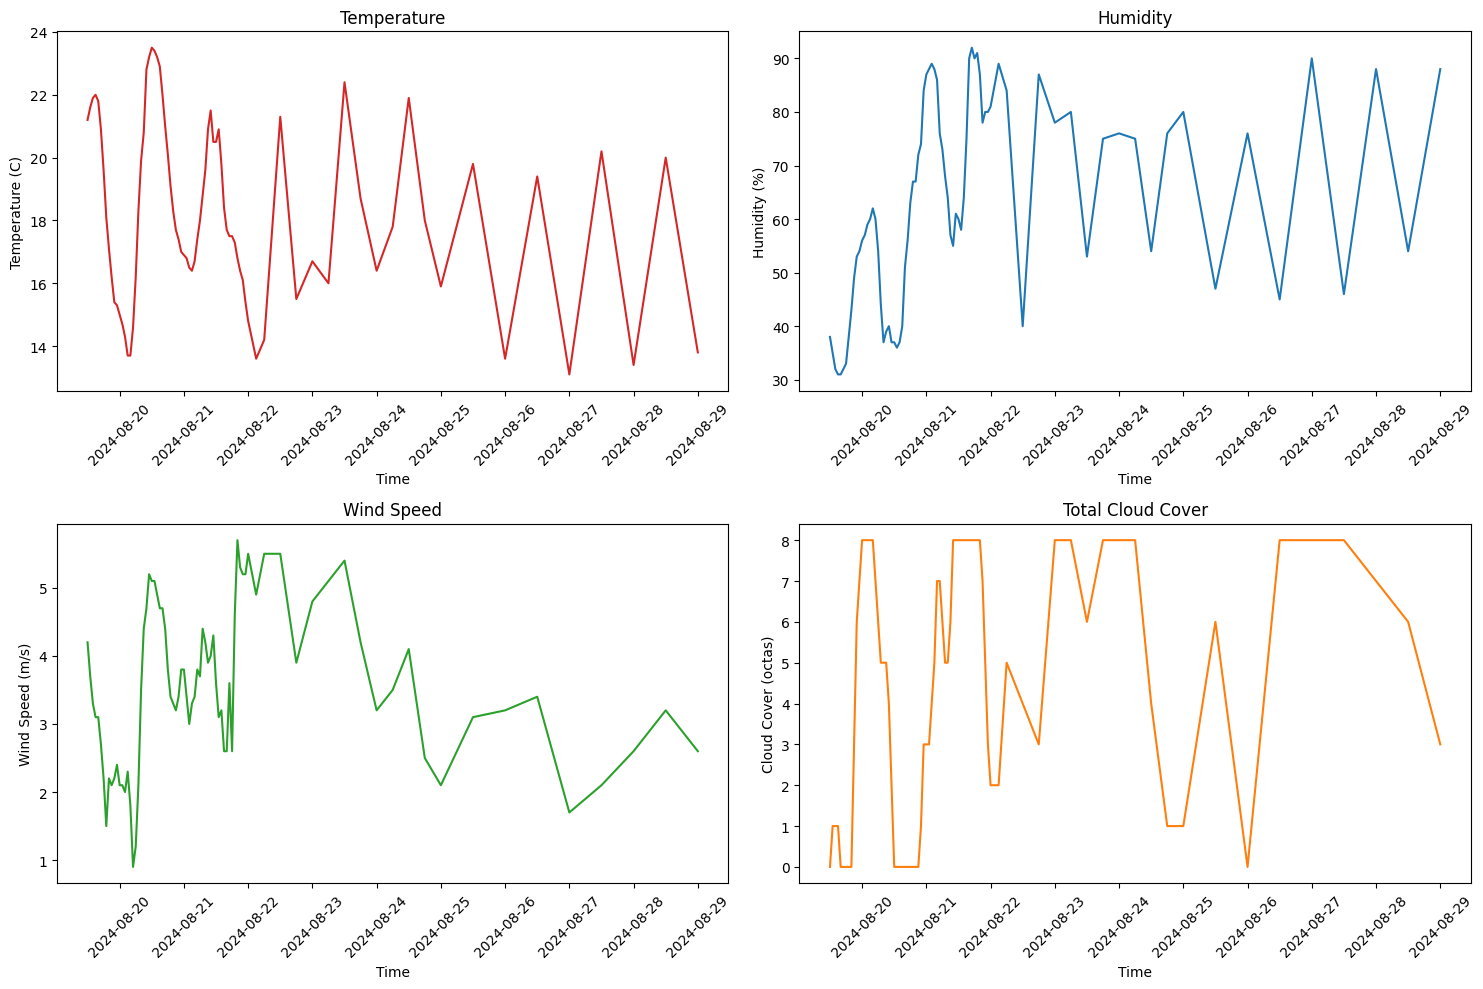

In [71]:
# Let's visualize some data


import matplotlib.pyplot as plt

def plot_weather_data(df):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].plot(df['valid_time'], df['temperature'], color='tab:red')
    axs[0, 0].set_title('Temperature')
    axs[0, 0].set_xlabel('Time')
    axs[0, 0].set_ylabel('Temperature (C)')
    # Rotate x-axis labels and make them fewer
    # axs[0, 0].set_xticks(axs[0, 0].get_xticks()[::4])
    axs[0, 0].tick_params(axis='x', rotation=45)

    axs[0, 1].plot(df['valid_time'], df['humidity'], color='tab:blue')
    axs[0, 1].set_title('Humidity')
    axs[0, 1].set_xlabel('Time')
    axs[0, 1].set_ylabel('Humidity (%)')
    # axs[0, 1].set_xticks(axs[0, 1].get_xticks()[::4])
    axs[0, 1].tick_params(axis='x', rotation=45)

    axs[1, 0].plot(df['valid_time'], df['wind_speed'], color='tab:green')
    axs[1, 0].set_title('Wind Speed')
    axs[1, 0].set_xlabel('Time')
    axs[1, 0].set_ylabel('Wind Speed (m/s)')
    # axs[1, 0].set_xticks(axs[1, 0].get_xticks()[::4])
    axs[1, 0].tick_params(axis='x', rotation=45)

    axs[1, 1].plot(df['valid_time'], df['total_cloud_cover'], color='tab:orange')
    axs[1, 1].set_title('Total Cloud Cover')
    axs[1, 1].set_xlabel('Time')
    axs[1, 1].set_ylabel('Cloud Cover (octas)')
    # axs[1, 1].set_xticks(axs[1, 1].get_xticks()[::4])
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].set_xticks()

    plt.tight_layout()
    plt.show()

plot_weather_data(df)